In [1]:
# !pip install textblob
# !pip install wordcloud
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from IPython.display import Markdown, display
import os
import random
from tqdm import tqdm
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df_final = pd.read_csv("final_dataset.csv")
df_final.tweet_text.drop_duplicates(inplace=True)
df_final.head()

,ids,time,tweet_text,tag
0,1.388060e+18,30-04-2021 09:31,Low ceilings give me anxiety,0
1,1.390000e+18,30-04-2021 22:47,Im so glad Im aware that my mother has her own...,0
2,1.390000e+18,30-04-2021 12:34,Yep relatable I care about people a lot but my...,0
3,1.390000e+18,30-04-2021 08:41,MEOWampTHE BOIZ is a unique collection of MEOW...,1
4,1.388090e+18,30-04-2021 11:01,non desi moots what do yall call this pls dont...,0


In [4]:
df_final.tweet_text = df_final.tweet_text.str.replace("<NEWLINE>", " ")
df_final.head()

,ids,time,tweet_text,tag
0,1.388060e+18,30-04-2021 09:31,Low ceilings give me anxiety,0
1,1.390000e+18,30-04-2021 22:47,Im so glad Im aware that my mother has her own...,0
2,1.390000e+18,30-04-2021 12:34,Yep relatable I care about people a lot but my...,0
3,1.390000e+18,30-04-2021 08:41,MEOWampTHE BOIZ is a unique collection of MEOW...,1
4,1.388090e+18,30-04-2021 11:01,non desi moots what do yall call this pls dont...,0


In [5]:
df_final['tweet_text'].dropna(inplace=True)

In [6]:
tweets = list(df_final.tweet_text.str.lower())
sent = list(df_final.tag)
ran = random.randint(0,len(tweets))

tweet = tweets[ran]
tag = sent[ran]
tweet = tweet.lower().replace("'", "")
if tag == 1 :
    color = 'green'
else:
    color = "red"
display(Markdown(f"<span style='color:{color}'>{tweet}</span>"))

<span style='color:green'>glad i got to drive him if only the once</span>

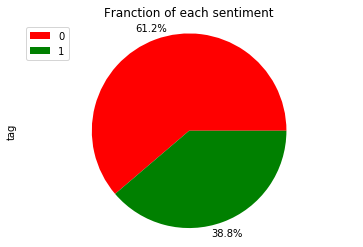

In [7]:
df_final.tag.value_counts().plot(kind="pie",
                               autopct='%1.1f%%',
                               labels=None,
                               pctdistance=1.12,
                               colors=["red", "green"])
plt.axis('equal')
plt.title("Franction of each sentiment")
plt.legend(labels=df_final.tag.value_counts().index, loc="upper left")
plt.show()

In [8]:
stop_words = set(STOPWORDS)
stop_words.add("xa0")
stop_words.add("https")
stop_words.add("twitter")
stop_words.add("tweet")
stop_words.add("pic")
stop_words.add("i")
stop_words.add("com")

def create_wordcloud(tweets, bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        width=1000,
        height=500,
        contour_color='steelblue',
        stopwords=stop_words).generate(str(tweets))
    return wordcloud

(-0.5, 999.5, 499.5, -0.5)

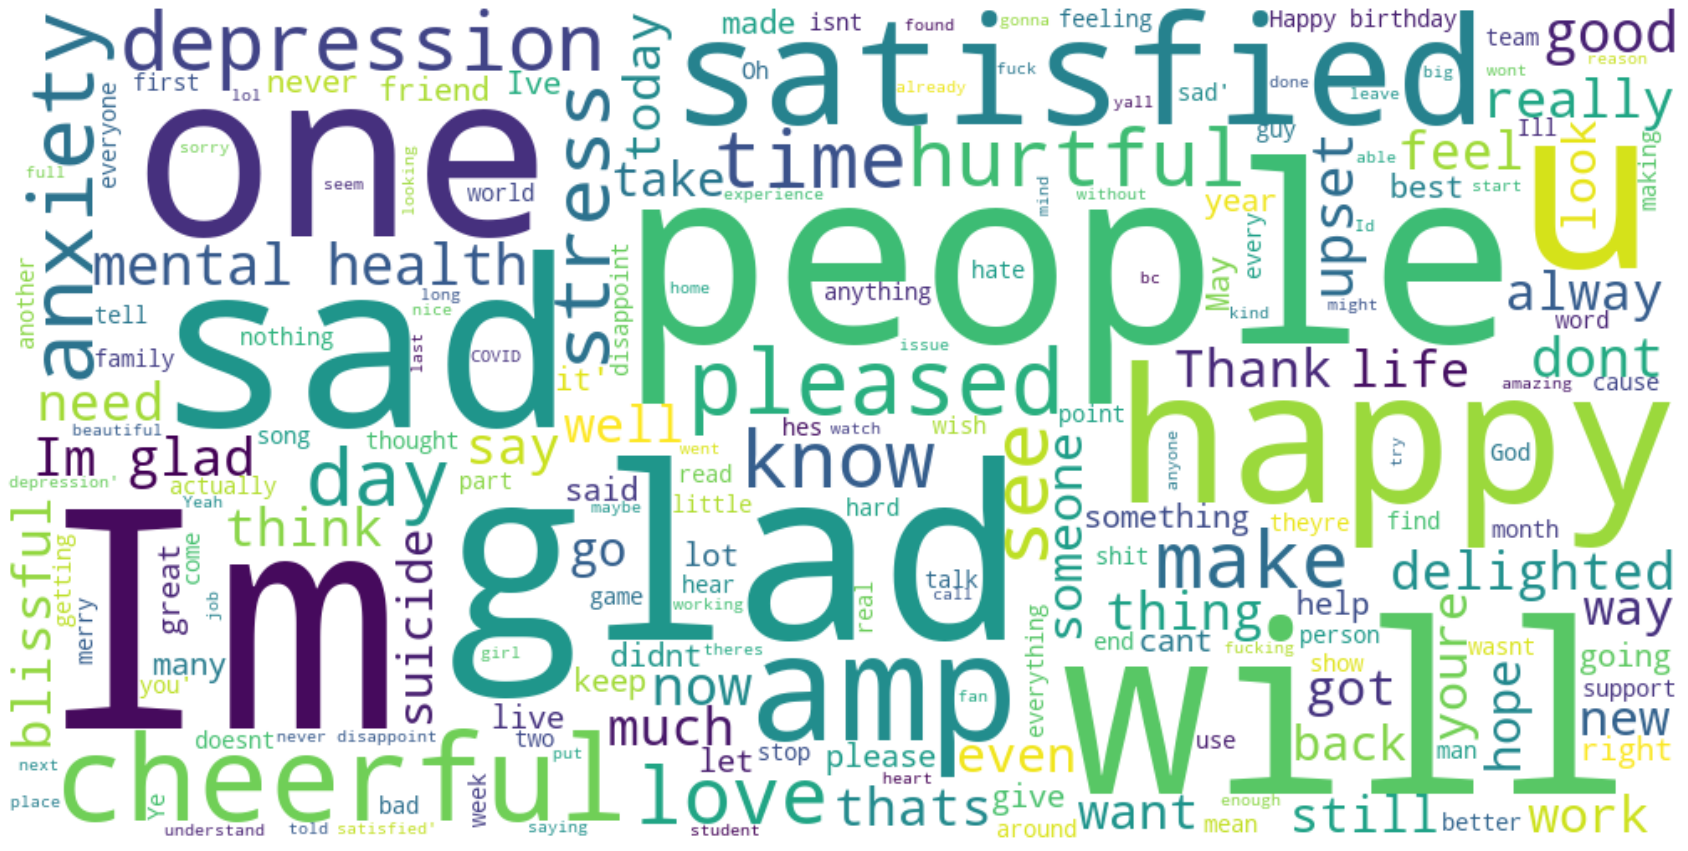

In [9]:
plt.rcParams["figure.figsize"] = 30, 30
wordcloud = create_wordcloud(set(df_final.tweet_text), "white")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [10]:
df_normal = pd.read_csv("2-normal_tag_dataset.csv")
df_normal.head()

,ids,time,tweet_text,tag
0,1.390000e+18,30-04-2021 21:41,Yes just fancied it Its blissful,1
1,1.390000e+18,30-04-2021 21:40,Great Relief and Blissful As Bobde out its Gar...,1
2,1.390000e+18,30-04-2021 21:36,My parents did register to stand a better chan...,0
3,1.390000e+18,30-04-2021 21:36,Writing a ship I genuinely love has inverted m...,1
4,1.390000e+18,30-04-2021 21:35,this might help you,1


(-0.5, 999.5, 499.5, -0.5)

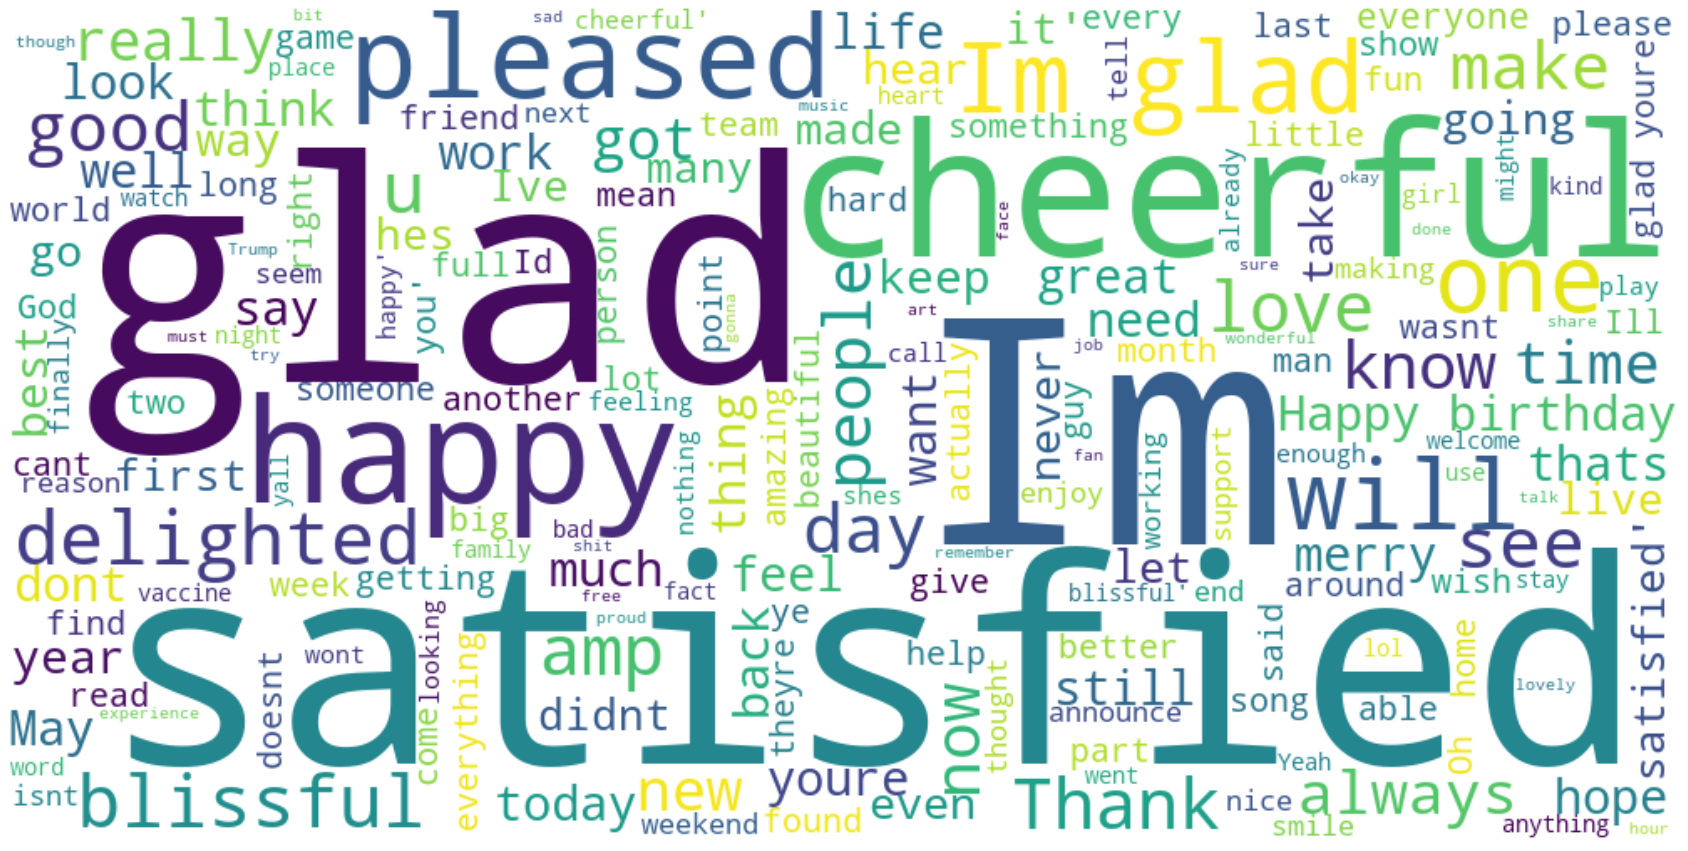

In [11]:
wordcloud = create_wordcloud(set(df_normal.tweet_text), "white")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [12]:
df_final["day"] = df_final.time.str[:-9]
df_final["hour"] = df_final.time.str[-8:]
df_final.head()

,ids,time,tweet_text,tag,day,hour
0,1.388060e+18,30-04-2021 09:31,Low ceilings give me anxiety,0,30-04-2,21 09:31
1,1.390000e+18,30-04-2021 22:47,Im so glad Im aware that my mother has her own...,0,30-04-2,21 22:47
2,1.390000e+18,30-04-2021 12:34,Yep relatable I care about people a lot but my...,0,30-04-2,21 12:34
3,1.390000e+18,30-04-2021 08:41,MEOWampTHE BOIZ is a unique collection of MEOW...,1,30-04-2,21 08:41
4,1.388090e+18,30-04-2021 11:01,non desi moots what do yall call this pls dont...,0,30-04-2,21 11:01


In [13]:
df_frequency = df_final.hour.str[:2].value_counts().to_frame().reset_index()
df_frequency.columns = ["hour", "count"]
df_frequency.hour = df_frequency.hour.astype(int)
df_frequency = df_frequency.sort_values(by="hour").reset_index()[["hour", "count"]]
df_frequency

,hour,count
0,21,16521


In [14]:
# df_frequency.plot(kind="bar", x="hour", y="count", figsize=(12, 5), color='r',rot=0)

## Word2Vec

In [15]:
# # import tensorflow as tf
# from tensorflow.keras import layers as ly
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
df_tweet_tag = df_final[['tweet_text','tag']]
df_tweet_tag.tweet_text = df_tweet_tag.tweet_text.astype(str)
print(np.where(pd.isnull(df_tweet_tag.tweet_text)))
print(len(df_tweet_tag))
df_tweet_tag=df_tweet_tag.dropna(subset=['tweet_text'])
print(np.where(pd.isnull(df_tweet_tag.tweet_text)))
print(len(df_tweet_tag))

(array([], dtype=int64),)
16521
(array([], dtype=int64),)
16521


C:\Users\Suyash\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
# df_tweet_tag.to_csv("dataset_tweets_tags.csv", index=False)

In [18]:
# if not os.path.exists("tweets.txt"):
#     tweets = []
#     for line in tqdm(list(df_tweet_tag.tweet_text)):
#         line = str(line)
#         for word in line.split(" "):
#             if word in stopwords.words():
#                 line = line.replace(word + " ", "")
#         tweets.append(line)
#     tokenizer = Tokenizer()
#     tokenizer.fit_on_texts(tweets)
#     total_words = len(tokenizer.word_index) + 1

In [19]:
# Remove blank rows if any.
df_tweet_tag['tweet_text'].dropna(inplace=True)

In [20]:
# Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_tweet_tag['tweet_text'] = [word.lower() for word in df_tweet_tag['tweet_text']]

In [21]:
# Tokenization : In this each entry in the corpus will be broken into set of words
df_tweet_tag['tweet_text'] = [word_tokenize(word) for word in df_tweet_tag['tweet_text']]

In [22]:
import nltk
# nltk.download('all')


In [23]:
# Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(df_tweet_tag['tweet_text'] ):
    
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    
    # The final processed set of words for each iteration will be stored in 'text_final'
    df_tweet_tag.loc[index,'text_final'] = str(Final_words)


In [24]:
df_tweet_tag.head()

,tweet_text,tag,text_final
0,"[low, ceilings, give, me, anxiety]",0,"['low', 'ceiling', 'give', 'anxiety']"
1,"[im, so, glad, im, aware, that, my, mother, ha...",0,"['im', 'glad', 'im', 'aware', 'mother', 'issue..."
2,"[yep, relatable, i, care, about, people, a, lo...",0,"['yep', 'relatable', 'care', 'people', 'lot', ..."
3,"[meowampthe, boiz, is, a, unique, collection, ...",1,"['meowampthe', 'boiz', 'unique', 'collection',..."
4,"[non, desi, moots, what, do, yall, call, this,...",0,"['non', 'desi', 'moot', 'yall', 'call', 'pls',..."


In [25]:
#save final preprocessed file so that it can be used directly without running upper cells
# df_tweet_tag.to_csv("preprocessed-file.csv",index = False)

In [25]:
data_final = pd.read_csv("preprocessed-file.csv")

In [26]:
np.random.seed(50)

In [27]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data_final['text_final'],data_final['tag'],test_size=0.3)

In [28]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [29]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data_final['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [30]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  78.07141416179141


In [37]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
Model = SVM.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  81.66229574339317


***K FOLD CROSS VALIDATION***

#### **1. Naive Bayes**

In [32]:
X = data_final['text_final']
Y = data_final['tag']
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
X = Tfidf_vect.transform(X)

Encoder = LabelEncoder()
Y = Encoder.fit_transform(Y)

In [33]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=50, random_state=1, shuffle=True)

model = naive_bayes.MultinomialNB()
# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)))

Accuracy: 77.834 (0.025)


#### **2. SVM**

In [34]:
# evaluate a svm model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)))

Accuracy: 81.817 (0.009)
